<span style="font-size: 10px">Namah Siddham

# <span style = 'color:green'>**1. Project Description and Objective**

AdventureWorks is a global manufacturing company that produces cycling equipment and accessories. The management team needs a way to track KPIs (sales, revenue, profit,returns), compare regional performance, analyze product-level trends, identify high value customers, seasonal trends, best-selling products or key factors influencing sales.

<font size="5">A folder of raw csv files are available which contains information about transactions, returns, products, customers and sales territories.

# <span style = 'color:green'>**2. Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go
import plotly.offline as pyo
import dash
from dash import dcc
from dash import html
import dash_table
from dash.dependencies import Input,Output,State
import warnings
warnings.filterwarnings("ignore")

# <span style = 'color:green'>**3. Import Data**

### <span style = 'color:orange'>**3.1 Import Territories Data**

In [2]:
aw_territories = pd.read_csv('AdventureWorks Territory Lookup.csv')
aw_territories.head()

,SalesTerritoryKey,Region,Country,Continent
0,1,Northwest,United States,North America
1,2,Northeast,United States,North America
2,3,Central,United States,North America
3,4,Southwest,United States,North America
4,5,Southeast,United States,North America


The company does business across 10 different territories as shown in this table. Each territory is uniquely identified by a territory key.

### <span style = 'color:orange'>**3.2 Import Customers Data**

In [3]:
aw_customers = pd.read_csv('AdventureWorks Customer Lookup.csv',encoding='latin-1')
aw_customers.head()

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,1965-08-12,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,1968-02-15,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,1968-08-08,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y


Names, contact details, income and education details available for customers in this table. Each customer is identified by a unique customer key.

### <span style = 'color:orange'>**3.3 Import Products Data**

In [4]:
aw_products = pd.read_csv('AdventureWorks Product Lookup.csv')
aw_products.head()

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442


Description of the products and their attributes are available in this table. Each product is identified by a unique product key.


### <span style = 'color:orange'>**3.4 Import Product Categories Data**

In [5]:
aw_products_categories = pd.read_csv('AdventureWorks Product Categories Lookup.csv')
aw_products_categories.head()

,ProductCategoryKey,CategoryName
0,1,Bikes
1,2,Components
2,3,Clothing
3,4,Accessories


The products are divided into 4 broad categories and each category is identified by a unique product category key.

### <span style = 'color:orange'>**3.5 Import Product Sub Categories Data**

In [6]:
aw_products_subcategories = pd.read_csv('AdventureWorks Product Subcategories Lookup.csv')
aw_products_subcategories.head()

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1
3,4,Handlebars,2
4,5,Bottom Brackets,2


Each product category has sub category. Each product sub category is identified by a unique product subcategory key.

### <span style = 'color:orange'>**3.6 Import Sales Data**

In [7]:
aw_sales_2020 = pd.read_csv('AdventureWorks Sales Data 2020.csv')  # Sales for year 2020
aw_sales_2021 = pd.read_csv('AdventureWorks Sales Data 2021.csv')  # Sales for year 2021
aw_sales_2022 = pd.read_csv('AdventureWorks Sales Data 2022.csv')  # Sales for year 2022

In [8]:
aw_sales_2022.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2022-01-01,2021-12-13,SO61285,529,23791,1,2,2
1,2022-01-01,2021-09-24,SO61285,214,23791,1,3,1
2,2022-01-01,2021-09-04,SO61285,540,23791,1,1,1
3,2022-01-01,2021-09-28,SO61301,529,16747,1,2,2
4,2022-01-01,2021-10-21,SO61301,377,16747,1,1,1


The above tables contain sales information for year 2020, 2021 and 2022.

### <span style = 'color:orange'>**3.7 Import Product Returns Data**

In [9]:
aw_returns = pd.read_csv('AdventureWorks Returns Data.csv')
aw_returns.head()

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,2020-01-18,9,312,1
1,2020-01-18,10,310,1
2,2020-01-21,8,346,1
3,2020-01-22,4,311,1
4,2020-02-02,6,312,1


The above table contains information about the products returned by the customers.

# <span style = 'color:green'>**4. Data Preprocessing and Cleaning**

### <span style = 'color:orange'>**4.1 Concatenating Sales 2020, Sales 2021 and Sales 2022 Tables**

In [10]:
aw_sales = pd.concat(objs=[aw_sales_2020,aw_sales_2021,aw_sales_2022],axis=0,ignore_index=True)
aw_sales.head()  # Sales table containing all years data

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1


### <span style = 'color:orange'>**4.2 Joining Sales Table and Territory Table**

In [11]:
aw_sales = aw_sales.merge(aw_territories,left_on='TerritoryKey',right_on='SalesTerritoryKey',how='inner').drop(['TerritoryKey','SalesTerritoryKey'],axis=1)
aw_sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,Northwest,United States,North America
1,2020-01-04,2019-09-15,SO45098,310,29167,1,1,Northwest,United States,North America
2,2020-01-04,2019-12-20,SO45099,312,29174,1,1,Northwest,United States,North America
3,2020-01-06,2019-09-24,SO45103,310,29140,1,1,Northwest,United States,North America
4,2020-01-08,2019-11-21,SO45117,342,14727,1,1,Northwest,United States,North America


### <span style = 'color:orange'>**4.3 Joining Products, Products Category and Products Subcategory Table**

In [12]:
aw_products = aw_products.merge(aw_products_subcategories,on='ProductSubcategoryKey',how='inner').merge(aw_products_categories,on='ProductCategoryKey',how='inner')

In [13]:
# Dropping Product Category Key and Product Sub Category Key Columns from the Products Table

aw_products.drop(['ProductCategoryKey','ProductSubcategoryKey'],axis=1,inplace=True)
aw_products.head()

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,Accessories
1,215,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,Accessories
2,220,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442,Helmets,Accessories
3,446,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,0,0,51.5625,125.0000,Panniers,Accessories
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",NaN,0,0,10.3125,25.0000,Locks,Accessories


### <span style = 'color:orange'>**4.4 Handling Null Values**

In [14]:
def pct_values_missing(df):
    """Defining a function to calculate percent values missing in each column of the dataframe and reporting it in a bar plot"""
    pct_missing = (df.isnull().sum()/df.size).sort_values(ascending=False)*100
    return pct_missing.plot(kind='bar')

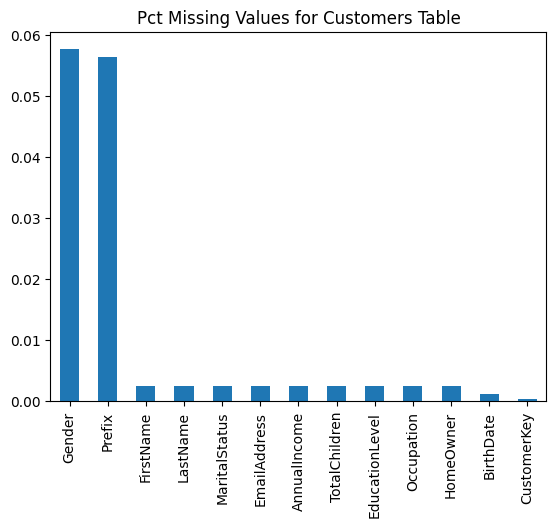

In [15]:
pct_values_missing(aw_customers)
plt.title('Pct Missing Values for Customers Table');

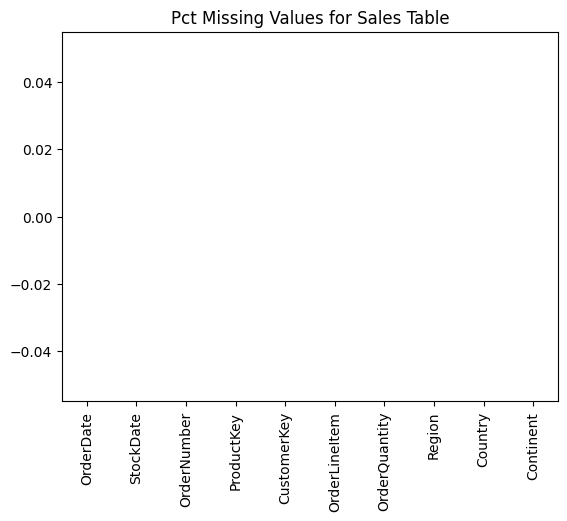

In [16]:
pct_values_missing(aw_sales)
plt.title('Pct Missing Values for Sales Table');

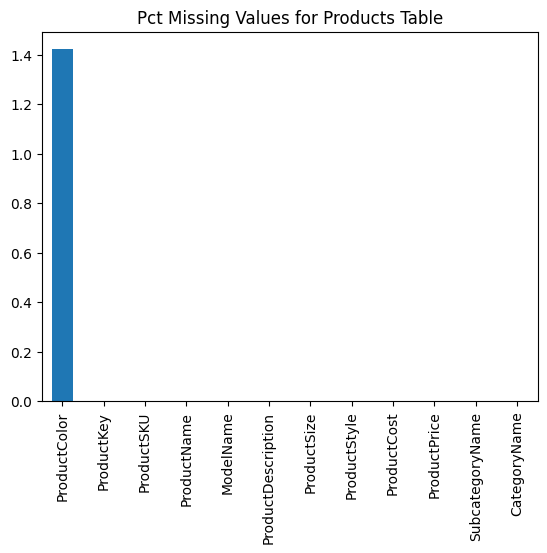

In [17]:
pct_values_missing(aw_products)
plt.title('Pct Missing Values for Products Table');

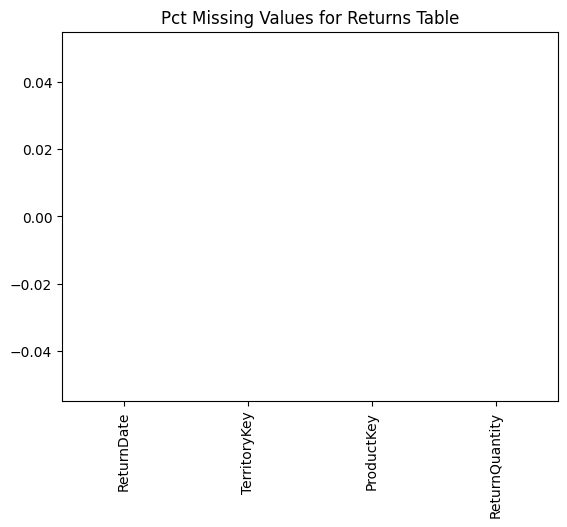

In [18]:
pct_values_missing(aw_returns)
plt.title('Pct Missing Values for Returns Table');

There are null values present in Customers Table and Products Table. The percent missing values are less than 1% for each column. However, exploring to fill the missing values to not loose any sales information.

In [19]:
# Dropping rows which has all values as null in customers table
print(f'Total Null Values: {aw_customers.isnull().sum().sum()}')  # Displaying total number of null values
aw_customers.dropna(how='all',inplace=True)
print(f'Total Null Values After Dropping Rows: {aw_customers.isnull().sum().sum()}')

Total Null Values: 327
Total Null Values After Dropping Rows: 314


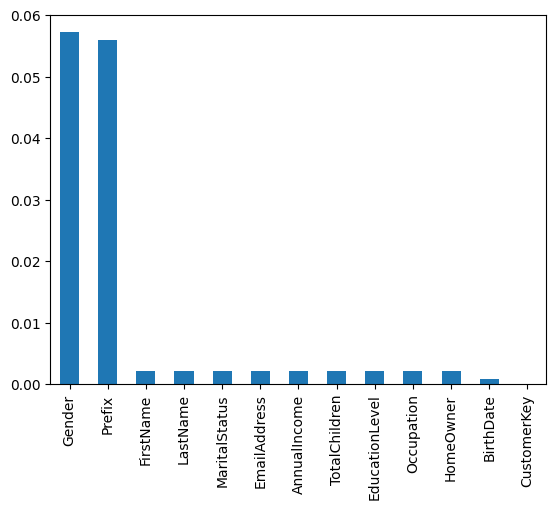

In [20]:
pct_values_missing(aw_customers);

In [21]:
aw_customers.loc[aw_customers.isnull().any(axis=1)]  # Filtering rows which has at least 1 value null.

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
24,11025,NaN,ALEJANDRO,BECK,1945-12-23,M,NaN,alejandro45@adventure-works.com,10000.0,2.0,Partial High School,Clerical,Y
34,11035,NaN,WENDY,DOMINGUEZ,1948-02-24,M,NaN,wendy12@adventure-works.com,10000.0,2.0,Partial High School,Clerical,Y
81,11082,NaN,ANGELA,BUTLER,1966-08-04,S,NaN,angela17@adventure-works.com,130000.0,0.0,Graduate Degree,Management,N
228,11234,NaN,ANNA,GRIFFIN,1952-11-19,S,NaN,anna46@adventure-works.com,70000.0,4.0,Partial College,Professional,Y
464,11475,NaN,CESAR,SUBRAM,1978-10-09,S,NaN,cesar12@adventure-works.com,30000.0,0.0,High School,Manual,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18148,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18149,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18150,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18152,Export date 20230101 14:59:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Last 5 Rows from 18148 to 18153 has all null values and some incorrect values. Dropping those rows.

In [22]:
aw_customers.loc[18148:18153]

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
18148,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18149,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18150,30---,m,NaN,NaN,1900-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18152,Export date 20230101 14:59:17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18153,Source AW_Cust_Master,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
aw_customers.drop(index=[18148,18149,18150,18152,18153],inplace=True)

In [24]:
aw_customers.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [25]:
# Dropping Prefix Column as it has some null values and is not useful for analysis.

aw_customers.drop('Prefix',axis=1,inplace=True)

Filling Null values in Gender Column using Gender Detector. The Gender Detector will identify the gender based on their first names.

In [26]:
# Pulling out customer keys of rows where gender is missing to check genders for these customer keys after using gender detector method.

missing_genders = aw_customers[aw_customers['Gender'].isnull()].index
missing_genders

Int64Index([   24,    34,    81,   228,   464,   512,   608,   627,   944,
             1254,
            ...
            16953, 16961, 17029, 17107, 17469, 17655, 17673, 17806, 18012,
            18112],
           dtype='int64', length=130)

In [27]:
aw_customers.loc[:,'FirstName'] = aw_customers.loc[:,'FirstName'].str.title()  # converting first names into title case for using it with gender detector method.

import gender_guesser.detector as gender

gd = gender.Detector()

# Function to infer gender
def infer_gender(row):
    if pd.isna(row['Gender']):
        return gd.get_gender(row['FirstName'])
    else:
        return row['Gender']

# Apply the function
aw_customers['Gender'] = aw_customers.apply(infer_gender, axis=1)

In [28]:
aw_customers.loc[missing_genders]

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
24,11025,Alejandro,BECK,1945-12-23,M,male,alejandro45@adventure-works.com,10000.0,2.0,Partial High School,Clerical,Y
34,11035,Wendy,DOMINGUEZ,1948-02-24,M,female,wendy12@adventure-works.com,10000.0,2.0,Partial High School,Clerical,Y
81,11082,Angela,BUTLER,1966-08-04,S,female,angela17@adventure-works.com,130000.0,0.0,Graduate Degree,Management,N
228,11234,Anna,GRIFFIN,1952-11-19,S,female,anna46@adventure-works.com,70000.0,4.0,Partial College,Professional,Y
464,11475,Cesar,SUBRAM,1978-10-09,S,male,cesar12@adventure-works.com,30000.0,0.0,High School,Manual,N
...,...,...,...,...,...,...,...,...,...,...,...,...
17655,28981,Luke,JAI,1940-03-17,S,male,luke21@adventure-works.com,60000.0,3.0,Graduate Degree,Management,N
17673,28999,Edward,MARTINEZ,1947-10-24,M,male,edward40@adventure-works.com,70000.0,2.0,Bachelors,Management,N
17806,29136,Caroline,BRYANT,1964-05-08,M,female,caroline19@adventure-works.com,60000.0,4.0,Bachelors,Skilled Manual,Y
18012,29345,Randall,DIAZ,1942-02-26,S,male,randall4@adventure-works.com,40000.0,2.0,Bachelors,Management,N


In [29]:
aw_customers.loc[missing_genders]['Gender'].value_counts()

female           63
male             54
mostly_female     7
mostly_male       3
unknown           2
andy              1
Name: Gender, dtype: int64

In [30]:
aw_customers.loc[aw_customers['Gender'].isin(['mostly_female','mostly_male','unknown','andy'])]

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
5484,16590,Shawn,DENG,1953-09-02,M,mostly_male,shawn3@adventure-works.com,150000.0,3.0,Bachelors,Management,Y
6214,17330,Latoya,BECKER,1962-08-15,M,unknown,latoya19@adventure-works.com,70000.0,5.0,Bachelors,Professional,Y
6217,17333,Misty,CHANDER,1957-04-17,S,mostly_female,misty17@adventure-works.com,70000.0,1.0,Partial College,Skilled Manual,Y
6571,17696,Madison,SIMMONS,1973-04-21,S,mostly_female,madison27@adventure-works.com,50000.0,1.0,Graduate Degree,Skilled Manual,Y
8637,19807,Shannon,ZHAO,1959-04-24,M,mostly_female,shannon11@adventure-works.com,110000.0,1.0,Bachelors,Management,Y
9265,20448,Jésus,BLANCO,1956-02-22,M,unknown,jésus14@adventure-works.com,80000.0,2.0,High School,Skilled Manual,Y
12732,23977,Gail,BUTLER,1958-02-24,S,mostly_female,gail4@adventure-works.com,20000.0,1.0,Bachelors,Manual,Y
13593,24851,Leslie,ORTEGA,1946-06-08,M,mostly_female,leslie22@adventure-works.com,130000.0,4.0,Partial College,Professional,Y
14254,25522,Casey,ANAND,1976-09-13,S,andy,casey22@adventure-works.com,30000.0,0.0,Partial College,Clerical,N
15526,26819,Devin,MITCHELL,1967-02-21,M,mostly_male,devin34@adventure-works.com,10000.0,3.0,High School,Manual,Y


Replacing mostly female with females, mostly male with males and removing rows where gender is andy or unknown for the purpose of this analysis. There are 3 rows where gender is either unknown or andy.

In [31]:
mask = aw_customers.loc[aw_customers['Gender'].isin(['unknown','andy'])].index
aw_customers.drop(index=mask,inplace=True)
aw_customers['Gender'].replace({'male':'M','mostly_male':'M','female':'F','mostly_female':'F'},inplace=True)

In [32]:
aw_customers.isnull().sum().sum()

0

There are no more null values present in Customers Table

In [33]:
# Exploring Null Values in Products Table

aw_products.isnull().sum()

ProductKey             0
ProductSKU             0
ProductName            0
ModelName              0
ProductDescription     0
ProductColor          50
ProductSize            0
ProductStyle           0
ProductCost            0
ProductPrice           0
SubcategoryName        0
CategoryName           0
dtype: int64

In [34]:
aw_products.loc[aw_products['ProductColor'].isnull()]

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",NaN,0,0,10.3125,25.0000,Locks,Accessories
5,448,PU-0452,Minipump,Minipump,Designed for convenience. Fits in your pocket....,NaN,0,0,8.2459,19.9900,Pumps,Accessories
6,449,PU-M044,Mountain Pump,Mountain Pump,Simple and light-weight. Emergency patches sto...,NaN,0,0,10.3084,24.9900,Pumps,Accessories
7,450,LT-T990,Taillights - Battery-Powered,Taillight,Affordable light for safe night riding - uses ...,NaN,0,0,5.7709,13.9900,Lights,Accessories
8,451,LT-H902,Headlights - Dual-Beam,Headlights - Dual-Beam,Rechargeable dual-beam headlight.,NaN,0,0,14.4334,34.9900,Lights,Accessories
9,452,LT-H903,Headlights - Weatherproof,Headlights - Weatherproof,Rugged weatherproof headlight.,NaN,0,0,18.5584,44.9900,Lights,Accessories
10,477,WB-H098,Water Bottle - 30 oz.,Water Bottle,AWC logo water bottle - holds 30 oz; leak-proof.,NaN,0,0,1.8663,4.9900,Bottles and Cages,Accessories
11,478,BC-M005,Mountain Bottle Cage,Mountain Bottle Cage,Tough aluminum cage holds bottle securly on to...,NaN,0,0,3.7363,9.9900,Bottles and Cages,Accessories
12,479,BC-R205,Road Bottle Cage,Road Bottle Cage,Aluminum cage is lighter than our mountain ver...,NaN,0,0,3.3623,8.9900,Bottles and Cages,Accessories
13,480,PK-7098,Patch Kit/8 Patches,Patch kit,"Includes 8 different size patches, glue and sa...",NaN,0,0,0.8565,2.2900,Tires and Tubes,Accessories


Removing 50 rows out of 293 rows is not a good idea. For the purpose of this analysis, relacing null values with unknown for Product Color Column.

In [35]:
aw_products['ProductColor'].fillna('unknown',inplace=True)

In [36]:
aw_products.isnull().sum().sum()

0

There are no more null values present in any of the table.

### <span style = 'color:orange'>**4.5 Handling Data Types**

In [37]:
# Checking Data Types for Column in Sales Table
aw_sales.dtypes

OrderDate        object
StockDate        object
OrderNumber      object
ProductKey        int64
CustomerKey       int64
OrderLineItem     int64
OrderQuantity     int64
Region           object
Country          object
Continent        object
dtype: object

In [38]:
aw_sales['StockDate'] = pd.to_datetime(aw_sales['StockDate'])  # Converting stock date column to datetime
aw_sales['OrderDate'] = pd.to_datetime(aw_sales['OrderDate'])  # Converting order date column to datetime

In [39]:
aw_sales.dtypes

OrderDate        datetime64[ns]
StockDate        datetime64[ns]
OrderNumber              object
ProductKey                int64
CustomerKey               int64
OrderLineItem             int64
OrderQuantity             int64
Region                   object
Country                  object
Continent                object
dtype: object

In [40]:
# Checking Data Type for Returns Table

aw_returns.dtypes

ReturnDate        object
TerritoryKey       int64
ProductKey         int64
ReturnQuantity     int64
dtype: object

In [41]:
# Converting Return Date Column to Datetime

aw_returns['ReturnDate'] = pd.to_datetime(aw_returns['ReturnDate'])

In [42]:
aw_returns.dtypes

ReturnDate        datetime64[ns]
TerritoryKey               int64
ProductKey                 int64
ReturnQuantity             int64
dtype: object

In [43]:
# Checking Data Types for Customers Table
aw_customers.dtypes

CustomerKey        object
FirstName          object
LastName           object
BirthDate          object
MaritalStatus      object
Gender             object
EmailAddress       object
AnnualIncome      float64
TotalChildren     float64
EducationLevel     object
Occupation         object
HomeOwner          object
dtype: object

In [44]:
# Converting categorical columns to Category Type
columns = ['MaritalStatus','Gender','EducationLevel','Occupation','HomeOwner']
aw_customers[columns] = aw_customers[columns].astype('category')

# Converting Birth Date Column to Datetime
aw_customers['BirthDate'] = pd.to_datetime(aw_customers['BirthDate'])

In [45]:
# Converting Customer Key Column to int type
aw_customers['CustomerKey'] = aw_customers['CustomerKey'].astype('int')

In [46]:
aw_customers.dtypes

CustomerKey                int32
FirstName                 object
LastName                  object
BirthDate         datetime64[ns]
MaritalStatus           category
Gender                  category
EmailAddress              object
AnnualIncome             float64
TotalChildren            float64
EducationLevel          category
Occupation              category
HomeOwner               category
dtype: object

In [47]:
# Checking Data Types for Products Table
aw_products.dtypes

ProductKey              int64
ProductSKU             object
ProductName            object
ModelName              object
ProductDescription     object
ProductColor           object
ProductSize            object
ProductStyle           object
ProductCost           float64
ProductPrice          float64
SubcategoryName        object
CategoryName           object
dtype: object

In [48]:
# Converting Categorical Columns to Category Type
columns = ['ProductColor','ProductStyle','ProductSize','SubcategoryName','CategoryName']
aw_products[columns] = aw_products[columns].astype('category')
aw_products.dtypes

ProductKey               int64
ProductSKU              object
ProductName             object
ModelName               object
ProductDescription      object
ProductColor          category
ProductSize           category
ProductStyle          category
ProductCost            float64
ProductPrice           float64
SubcategoryName       category
CategoryName          category
dtype: object

### <span style = 'color:orange'>**4.6 Handling Inconsistencies in Formatting of the Data**

In [49]:
aw_customers.head()

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,Jon,YANG,1966-04-08,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y
1,11001,Eugene,HUANG,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N
2,11002,Ruben,TORRES,1965-08-12,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y
3,11003,Christy,ZHU,1968-02-15,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N
4,11004,Elizabeth,JOHNSON,1968-08-08,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y


In [50]:
# Converting Last Names into title case
aw_customers['LastName'] = aw_customers['LastName'].str.title()
aw_customers.head()

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,Jon,Yang,1966-04-08,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y
1,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N
2,11002,Ruben,Torres,1965-08-12,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y
3,11003,Christy,Zhu,1968-02-15,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N
4,11004,Elizabeth,Johnson,1968-08-08,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y


No more inconsistencies present in customers table

In [51]:
aw_sales.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,Region,Country,Continent
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,Northwest,United States,North America
1,2020-01-04,2019-09-15,SO45098,310,29167,1,1,Northwest,United States,North America
2,2020-01-04,2019-12-20,SO45099,312,29174,1,1,Northwest,United States,North America
3,2020-01-06,2019-09-24,SO45103,310,29140,1,1,Northwest,United States,North America
4,2020-01-08,2019-11-21,SO45117,342,14727,1,1,Northwest,United States,North America


In [52]:
aw_sales['Region'].unique()

array(['Northwest', 'Southwest', 'Australia', 'Canada', 'United Kingdom',
       'France', 'Germany', 'Southeast', 'Northeast', 'Central'],
      dtype=object)

In [53]:
aw_sales['Continent'].unique()

array(['North America', 'Pacific', 'Europe'], dtype=object)

In [54]:
aw_sales['Country'].unique()

array(['United States', 'Australia', 'Canada', 'United Kingdom', 'France',
       'Germany'], dtype=object)

No inconsistencies present in sales table

In [55]:
aw_returns.head()

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,2020-01-18,9,312,1
1,2020-01-18,10,310,1
2,2020-01-21,8,346,1
3,2020-01-22,4,311,1
4,2020-02-02,6,312,1


No inconsistencies present in returns table

In [56]:
aw_products.head()

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,Accessories
1,215,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,Accessories
2,220,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442,Helmets,Accessories
3,446,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,0,0,51.5625,125.0000,Panniers,Accessories
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",unknown,0,0,10.3125,25.0000,Locks,Accessories


In [57]:
# Rounding Product Cost and Product Price Values to 2 Decimal Places
aw_products[['ProductCost','ProductPrice']] = aw_products[['ProductCost','ProductPrice']].round(2)
aw_products.head()

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.09,34.99,Helmets,Accessories
1,215,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.03,33.64,Helmets,Accessories
2,220,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.03,33.64,Helmets,Accessories
3,446,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,0,0,51.56,125.00,Panniers,Accessories
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",unknown,0,0,10.31,25.00,Locks,Accessories


In [58]:
# In the Product Style Column, replacing 0's with 'NA'"AdventureWorks Calendar Lookup.csv"

aw_products['ProductStyle'] = aw_products['ProductStyle'].replace({'0':'NA'})

In [59]:
# Removing Product Size Column (it has mixed values for numeric and text based sizes and it won't be helpful for analysis)

aw_products.drop('ProductSize',axis=1,inplace=True)

In [60]:
aw_products.head()

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,NA,13.09,34.99,Helmets,Accessories
1,215,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,NA,12.03,33.64,Helmets,Accessories
2,220,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,NA,12.03,33.64,Helmets,Accessories
3,446,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,NA,51.56,125.00,Panniers,Accessories
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",unknown,NA,10.31,25.00,Locks,Accessories


No more inconsistencies present in products table

### <span style = 'color:orange'>**4.7 Adding Calculated Columns/Derived Columns**

In [61]:
aw_products.head()

,ProductKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,NA,13.09,34.99,Helmets,Accessories
1,215,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,NA,12.03,33.64,Helmets,Accessories
2,220,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,NA,12.03,33.64,Helmets,Accessories
3,446,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,NA,51.56,125.00,Panniers,Accessories
4,447,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",unknown,NA,10.31,25.00,Locks,Accessories


##### <span style = 'color:yellow'>4.7.1 Adding Product SKU type Column

In [62]:
# Creating a New Column called SKU Type by extracting all the characters before second '-' in Product SKU Column
aw_products['SKU Type'] = aw_products['ProductSKU'].apply(lambda x: '-'.join(x.split('-')[:2]))

# Moving SKU type Column to 3 Position in the Table
sku = aw_products.pop('SKU Type')
aw_products.insert(loc=2,column='SKU Type',value=sku)
aw_products.head()

,ProductKey,ProductSKU,SKU Type,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,214,HL-U509-R,HL-U509,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,NA,13.09,34.99,Helmets,Accessories
1,215,HL-U509,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,NA,12.03,33.64,Helmets,Accessories
2,220,HL-U509-B,HL-U509,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,NA,12.03,33.64,Helmets,Accessories
3,446,PA-T100,PA-T100,"Touring-Panniers, Large",Touring-Panniers,"Durable, water-proof nylon construction with e...",Grey,NA,51.56,125.00,Panniers,Accessories
4,447,LO-C100,LO-C100,Cable Lock,Cable Lock,"Wraps to fit front and rear tires, carrier and...",unknown,NA,10.31,25.00,Locks,Accessories


In [63]:
aw_customers.head()

,CustomerKey,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,Jon,Yang,1966-04-08,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y
1,11001,Eugene,Huang,1965-05-14,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N
2,11002,Ruben,Torres,1965-08-12,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y
3,11003,Christy,Zhu,1968-02-15,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N
4,11004,Elizabeth,Johnson,1968-08-08,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y


##### <span style = 'color:yellow'>4.7.2 Adding Full Name and Age Column

In [64]:
# Adding Full Name Column to the Customers Table
aw_customers['FullName'] = aw_customers['FirstName'] + ' ' + aw_customers['LastName']

# Adding Customers Age Column to the Customers Table
from datetime import datetime
current_year = datetime.now().year
aw_customers['CustomerAge'] = current_year - aw_customers['BirthDate'].dt.year

# Relocating Age column to right after Birthdate Column
age = aw_customers.pop('CustomerAge')
aw_customers.insert(loc=4,column='CustomerAge',value=age)

aw_customers.head()

,CustomerKey,FirstName,LastName,BirthDate,CustomerAge,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,FullName
0,11000,Jon,Yang,1966-04-08,57,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y,Jon Yang
1,11001,Eugene,Huang,1965-05-14,58,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N,Eugene Huang
2,11002,Ruben,Torres,1965-08-12,58,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y,Ruben Torres
3,11003,Christy,Zhu,1968-02-15,55,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N,Christy Zhu
4,11004,Elizabeth,Johnson,1968-08-08,55,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y,Elizabeth Johnson


##### <span style = 'color:yellow'>4.7.3 Adding Customer Segmentation Columns

1. Create Calculated Column named CustomerPriority in the Customer Table based on criteria: a. if the customer is a parent and has an annual income >$100,000 then customer priority is 'Priority' otherwise 'Standard'
2. Segment Customers based on Income Level: >=150,000: very high, >=100,000: High, >=50,000: Average otherwise Low
3. Segment Customers based on Education Category: If partial high school or high school then 'high school', if bachelor's or partial college then 'undergrad', if graduate degree then Graduate
4. Segment Customers based on age groups.

In [65]:
aw_customers.head()

,CustomerKey,FirstName,LastName,BirthDate,CustomerAge,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,FullName
0,11000,Jon,Yang,1966-04-08,57,M,M,jon24@adventure-works.com,90000.0,2.0,Bachelors,Professional,Y,Jon Yang
1,11001,Eugene,Huang,1965-05-14,58,S,M,eugene10@adventure-works.com,60000.0,3.0,Bachelors,Professional,N,Eugene Huang
2,11002,Ruben,Torres,1965-08-12,58,M,M,ruben35@adventure-works.com,60000.0,3.0,Bachelors,Professional,Y,Ruben Torres
3,11003,Christy,Zhu,1968-02-15,55,S,F,christy12@adventure-works.com,70000.0,0.0,Bachelors,Professional,N,Christy Zhu
4,11004,Elizabeth,Johnson,1968-08-08,55,S,F,elizabeth5@adventure-works.com,80000.0,5.0,Bachelors,Professional,Y,Elizabeth Johnson


In [66]:
# Customer Segmentation Using Age Groups (Adding AgeGroup Column)
bins = [0, 20, 30, 40, 50, 60, float('inf')]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']
aw_customers['AgeGroup'] = pd.cut(aw_customers['CustomerAge'], bins=bins, labels=labels)

In [67]:
# Customer Segmentation using Income Levels (Adding IncomeLevel Column)

bins = [0,50000,100000,150000,float('inf')]
labels = ['Low','Average','High','Very High']

aw_customers['IncomeLevel'] = pd.cut(aw_customers['AnnualIncome'],bins=bins,labels=labels)

In [68]:
aw_customers['IncomeLevel'].unique()

['Average', 'Low', 'Very High', 'High']
Categories (4, object): ['Low' < 'Average' < 'High' < 'Very High']

In [69]:
aw_customers['EducationLevel'].unique()

['Bachelors', 'Partial College', 'High School', 'Partial High School', 'Graduate Degree']
Categories (5, object): ['Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School']

In [70]:
# Customer Segmentation Using Education Level (Adding Education Category Column)
aw_customers['EducationCategory'] = aw_customers['EducationLevel'].map({'Bachelors':'Bachelors','Partial College':'Bachelors','High School':'High School',
                                                                        'Partial High School':'High School','Graduate Degree':'Graduate'})

In [71]:
aw_customers['EducationCategory'].unique()

array(['Bachelors', 'High School', 'Graduate'], dtype=object)

In [72]:
# Customer Segmentation For Customer Priority (Adding CustomerPriority Column)

aw_customers['CustomerPriority'] = aw_customers.apply(lambda row:'Priority' if (row['AnnualIncome']>100000 and row['TotalChildren']>0) else 'Standard',axis=1)
aw_customers['CustomerPriority'].unique()

array(['Standard', 'Priority'], dtype=object)

### <span style = 'color:orange'>**4.8 Exporting Cleaned Data to CSV Files**

In [160]:
# Exporting Cleaned Data
aw_sales.to_csv('AW Sales.csv')
aw_customers.to_csv('AW Customers.csv')
aw_products.to_csv('AW Products.csv')
aw_returns.to_csv('AW Returns.csv')

# <span style = 'color:green'>**5. Sales Analysis**

### <span style = 'color:orange'>**5.1 Revenue Trend**

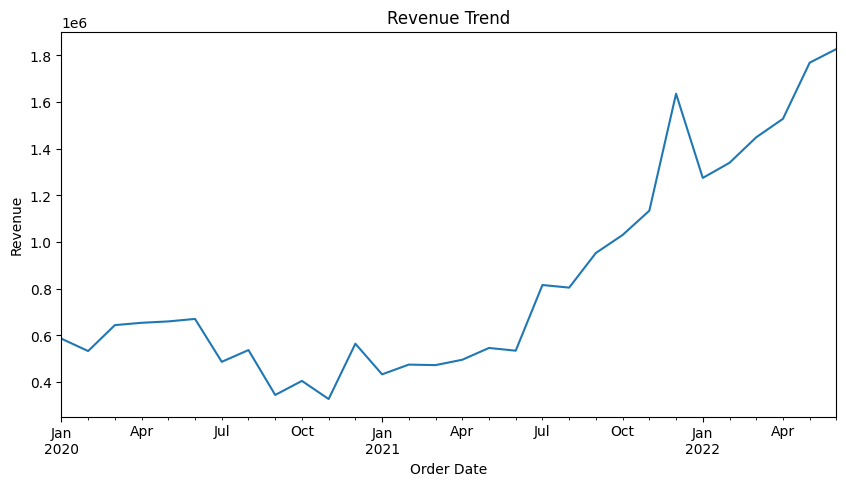

In [122]:
df_rev = aw_sales.merge(aw_products,on='ProductKey',how='inner')[['OrderDate','OrderQuantity','ProductPrice']]
df_rev['Revenue'] = df_rev['OrderQuantity'] * df_rev['ProductPrice']
df_rev = df_rev.set_index('OrderDate')['Revenue']
df_rev.resample(rule='M').sum().plot(figsize=(10,5),xlabel='Order Date',ylabel = 'Revenue',title='Revenue Trend');

### <span style = 'color:orange'>**5.2 Total Revenue, Total Orders, Total Profit and Return Rate For All Years**

In [74]:
total_orders = aw_sales['OrderNumber'].nunique()  # Total Orders
df_cost = aw_sales.merge(aw_products,on='ProductKey',how='inner')[['OrderDate','OrderQuantity','ProductCost']]
total_cost = (df_cost['OrderQuantity'] * df_cost['ProductCost']).sum()  # total cost = quantity * product cost
total_profit = df_rev.sum() - total_cost  # total revenue - total cost
return_rate = (aw_returns['ReturnQuantity'].sum())/aw_sales['OrderQuantity'].sum()

In [75]:
print(f'Total Revenue: {round(df_rev.sum()/1000000,2)} Million')
print(f'Total Orders: {total_orders}')
print(f'Total Profit: {round(total_profit/1000000,2)} Million')
print(f'Return Rate: {round(return_rate*100,2)}%')

Total Revenue: 24.91 Million
Total Orders: 25164
Total Profit: 10.46 Million
Return Rate: 2.17%


In [76]:
# Display in html styled output

from IPython.display import display, HTML

# Create a string of HTML code
html_string = f"""
<div style="background-color:green; color: white; font-size: 20px; display: inline-block; padding: 10px;">
    <strong>Total Revenue: </strong>{round(df_rev.sum()/1000000,2)} Million<br>
    <strong>Total Orders: </strong>{total_orders}<br>
    <strong>Total Profit: </strong>{round(total_profit/1000000,2)} Million<br>
    <strong>Return Rate: </strong>{round(return_rate*100,2)}%
</div>
"""

display(HTML(html_string))

### <span style = 'color:orange'>**5.3 Total Orders by Category**

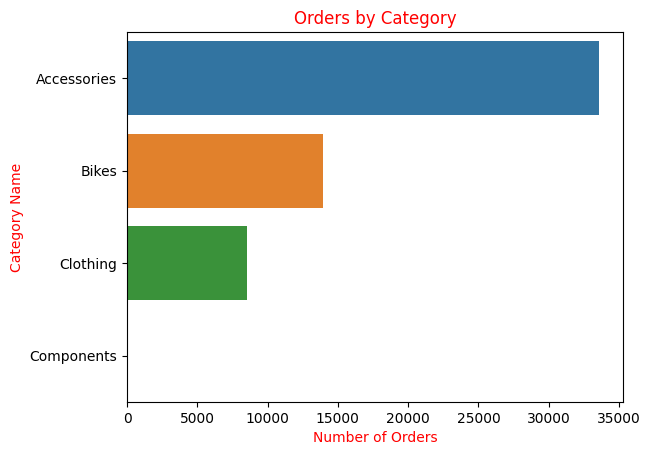

In [77]:
orders_by_category = aw_sales.merge(aw_products,on='ProductKey',how='inner')['CategoryName'].value_counts()
sns.barplot(x=orders_by_category,y=orders_by_category.index,orient='h')
plt.title('Orders by Category',color='red')
plt.xlabel('Number of Orders',color='red')
plt.ylabel('Category Name',color='red');

### <span style = 'color:orange'>**5.4 Most Ordered Product Type and Most Returned Product Type**

In [78]:
# Most Ordered Product Type
aw_sales.merge(aw_products, on="ProductKey", how="inner")[
    ["OrderNumber", "SubcategoryName"]
].groupby("SubcategoryName").count().idxmax()


OrderNumber    Tires and Tubes
dtype: object

In [79]:
# Most Returned Product Type (total returned quantity/total orders)
return_quantity = aw_returns.merge(aw_products, on="ProductKey", how="inner")[
    ["ReturnQuantity", "SubcategoryName"]
].groupby("SubcategoryName").sum()


In [80]:
total_orders = aw_sales.merge(aw_products, on="ProductKey", how="inner")[
    ["OrderNumber", "SubcategoryName"]
].groupby("SubcategoryName").count()

In [81]:
# Most Returned Product Type
(return_quantity['ReturnQuantity']/total_orders['OrderNumber']).idxmax()

'Shorts'

The most ordered product type is Tires and Tubes and Most Returned Product Type is Shorts.

### <span style = 'color:orange'>**5.5 Top 10 Products by Orders and Revenue**

In [82]:
product_rev = aw_sales.merge(aw_products,on='ProductKey',how='inner')[['ProductName','OrderQuantity','ProductPrice']]
product_rev['Revenue'] = product_rev['OrderQuantity'] * product_rev['ProductPrice']
product_rev = product_rev[['ProductName','Revenue']]
top10_product_rev = product_rev.groupby('ProductName').sum().sort_values(by='Revenue',ascending=False).head(10)

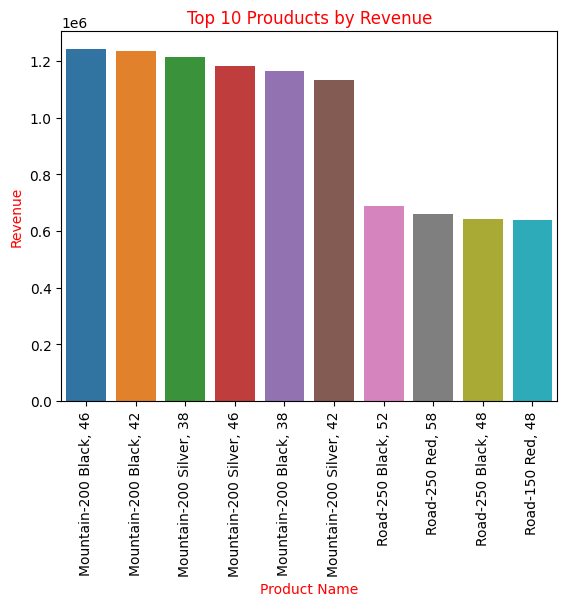

In [83]:
sns.barplot(data=top10_product_rev,x=top10_product_rev.index,y=top10_product_rev['Revenue'])
plt.xticks(rotation=90)
plt.title('Top 10 Prouducts by Revenue',color='red')
plt.xlabel('Product Name',color='red')
plt.ylabel('Revenue',color='red');

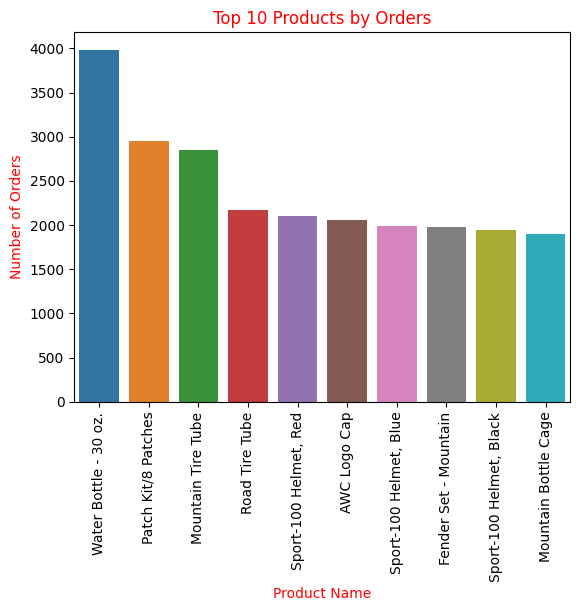

In [84]:
top10_orders = (
    aw_sales.merge(aw_products, on="ProductKey", how="inner")[
        ["ProductName", "OrderNumber"]
    ]
    .groupby("ProductName")
    .count()
    .sort_values(by="OrderNumber", ascending=False)
    .head(10)
)

sns.barplot(x=top10_orders.index, y=top10_orders["OrderNumber"])
plt.xticks(rotation=90)
plt.title("Top 10 Products by Orders",color='red')
plt.xlabel("Product Name",color='red')
plt.ylabel("Number of Orders",color='red');


### <span style = 'color:orange'>**5.6 Top 100 Customers Driving the Revenue**

In [85]:
# Merge Sales Table, Customer Table and Products Table and Get Relevant Columns
df1 = aw_sales.merge(aw_customers,on='CustomerKey',how='inner').merge(aw_products,on='ProductKey',how='inner')[['CustomerKey','FullName','OrderNumber','OrderQuantity','ProductPrice']]
df1.head()

,CustomerKey,FullName,OrderNumber,OrderQuantity,ProductPrice
0,14657,John Thomas,SO45080,1,699.1
1,14734,Kevin Edwards,SO45383,1,699.1
2,15189,Kayla Russell,SO46896,1,699.1
3,15252,Jada Murphy,SO47311,1,699.1
4,15311,Brandon Thompson,SO47507,1,699.1


In [86]:
# Add a Column for Revenue
df1['Revenue'] = df1['OrderQuantity'] * df1['ProductPrice']
df1.head()

,CustomerKey,FullName,OrderNumber,OrderQuantity,ProductPrice,Revenue
0,14657,John Thomas,SO45080,1,699.1,699.1
1,14734,Kevin Edwards,SO45383,1,699.1,699.1
2,15189,Kayla Russell,SO46896,1,699.1,699.1
3,15252,Jada Murphy,SO47311,1,699.1,699.1
4,15311,Brandon Thompson,SO47507,1,699.1,699.1


In [87]:
# Find Unique Number of Orders and Total Revenue for Each Customer Sorted by Revenue in Descending Order
top100_customers = df1.groupby(['CustomerKey','FullName']).agg({'OrderNumber':'nunique','Revenue':'sum'}).sort_values(by='Revenue',ascending=False).head(100).round().reset_index()

In [88]:
# Rename Columns
top100_customers.columns = ['CustomerKey','FullName','Number of Orders','Revenue']

In [89]:
# Find Top 100 Customers by Revenue
top100_customers.head(100)

,CustomerKey,FullName,Number of Orders,Revenue
0,11433,Maurice Shan,6,12408.0
1,11439,Janet Munoz,6,12015.0
2,11241,Lisa Cai,7,11330.0
3,11417,Lacey Zheng,7,11086.0
4,11420,Jordan Turner,7,11022.0
...,...,...,...,...
95,11905,Isaiah Ramirez,3,7949.0
96,11452,Erika Rubio,3,7945.0
97,11906,Gabriella Sanders,3,7943.0
98,11969,Randy Xu,3,7942.0


Maurice Shan is the Top Customer (by Revenue) with 6 Orders Placed for Total Amount $12408.

### <span style = 'color:orange'>**5.7 Customer Growth by Year**

<Axes: xlabel='OrderDate'>

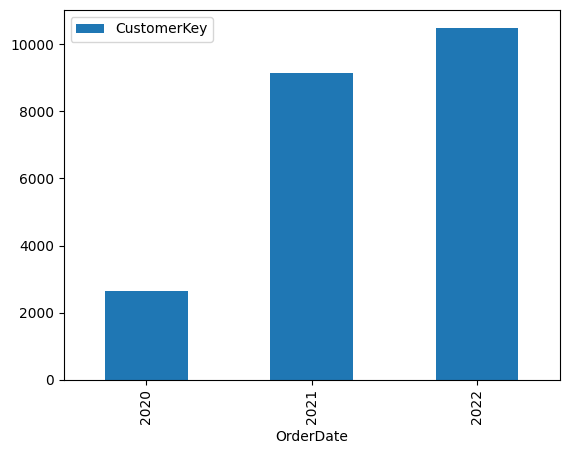

In [90]:
aw_sales.set_index(aw_sales['OrderDate'].dt.year).groupby(level=0).agg({'CustomerKey':'nunique'}).plot(kind='bar')

In [91]:
cust_count_2020 = aw_sales[aw_sales['OrderDate'].dt.year==2020]['CustomerKey'].nunique()
cust_count_2020_to_2021 = aw_sales[aw_sales['OrderDate'].dt.year.isin([2020,2021])]['CustomerKey'].nunique()
cust_count_2020_to_2022 = aw_sales[aw_sales['OrderDate'].dt.year.isin([2020,2021,2022])]['CustomerKey'].nunique()

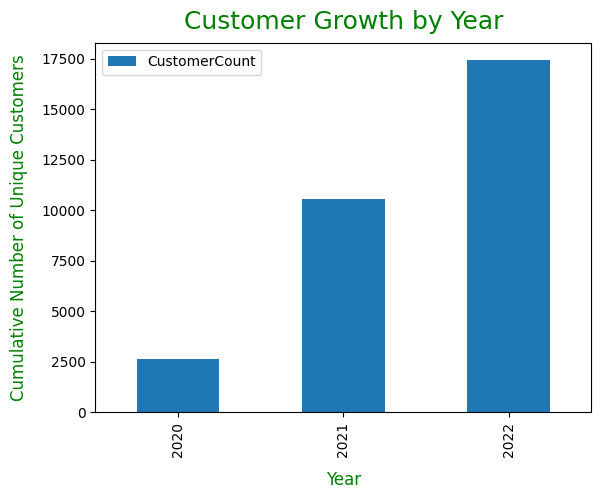

In [92]:
pd.DataFrame({'year':[2020,2021,2022],'CustomerCount':[cust_count_2020,cust_count_2020_to_2021,cust_count_2020_to_2022]}).set_index('year').plot(kind='bar')
plt.title('Customer Growth by Year',color='green',pad=10,fontdict={'size':18})
plt.xlabel('Year',color='green',labelpad=10,size=12)
plt.ylabel('Cumulative Number of Unique Customers',color='green',labelpad=10,size=12);

### <span style = 'color:orange'>**5.8 Orders by Income Level of Customers**

In [93]:
order_by_income = aw_sales.merge(aw_customers,on='CustomerKey',how='inner')[['IncomeLevel','OrderNumber']].groupby(by='IncomeLevel').agg({'OrderNumber':'nunique'})
order_by_income

,OrderNumber
IncomeLevel,
Low,11105
Average,11577
High,2161
Very High,316


In [94]:
order_by_income.columns = ['Total Orders']

In [95]:
order_by_income

,Total Orders
IncomeLevel,
Low,11105
Average,11577
High,2161
Very High,316


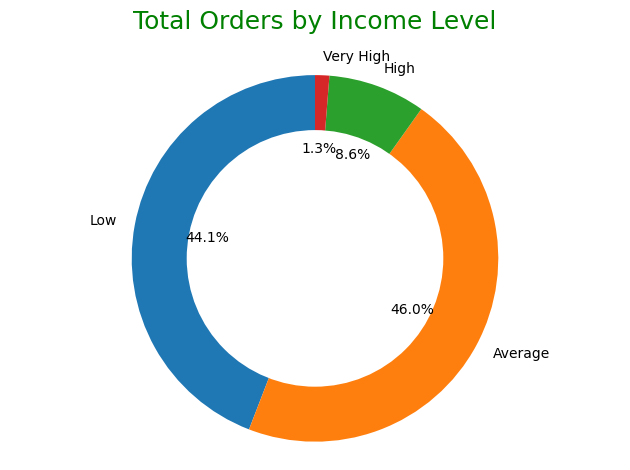

In [96]:
sizes = order_by_income['Total Orders']
labels = order_by_income.index

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a white circle at the center (to turn the pie chart into a doughnut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set title
plt.title('Total Orders by Income Level',pad=20,fontdict={'size':18,'color':'green'})
plt.tight_layout()
plt.show()


### <span style = 'color:orange'>**5.9 Total Orders by Occupation**

In [97]:
order_by_occupation = aw_sales.merge(aw_customers,on='CustomerKey',how='inner')[['Occupation','OrderNumber']].groupby(by='Occupation').agg({'OrderNumber':'nunique'})

In [98]:
order_by_occupation.columns = ['Total Orders']
order_by_occupation

,Total Orders
Occupation,
Clerical,3971
Management,4379
Manual,2934
Professional,7923
Skilled Manual,5952


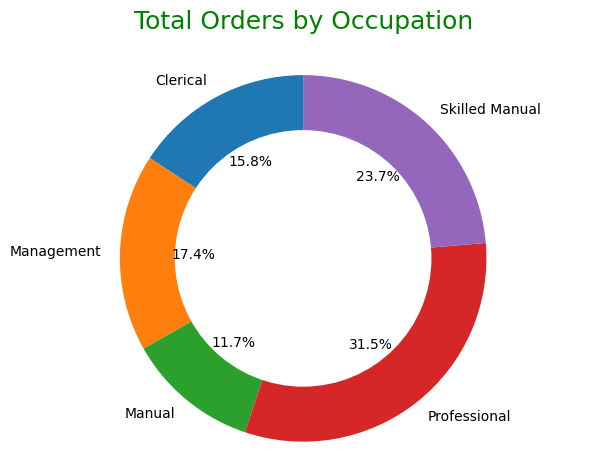

In [99]:
sizes = order_by_occupation['Total Orders']
labels = order_by_occupation.index

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a white circle at the center (to turn the pie chart into a doughnut chart)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Set title
plt.title('Total Orders by Occupation',pad=20,fontdict={'size':18,'color':'green'})
plt.tight_layout()
plt.show()

### <span style = 'color:orange'>**5.10 Revenue Per Customer and Trend of Revenue Per Customer**

Revenue Per Customer can be obtained by dividing total revenue by total number of customers.

In [100]:
aw_revenue = aw_sales.merge(aw_products,on='ProductKey',how='inner')[['OrderDate','ProductPrice','OrderQuantity']]
aw_revenue['Revenue'] = aw_revenue['ProductPrice']*aw_revenue['OrderQuantity']
aw_revenue.head()

,OrderDate,ProductPrice,OrderQuantity,Revenue
0,2020-01-01,699.1,1,699.1
1,2020-02-06,699.1,1,699.1
2,2020-07-27,699.1,1,699.1
3,2020-08-27,699.1,1,699.1
4,2020-09-09,699.1,1,699.1


In [101]:
# Calculating Cumulative Revenue
cum_sum_revenue = aw_revenue.set_index(aw_revenue['OrderDate'].dt.year)['Revenue'].groupby(level=0).sum().cumsum()
cum_sum_revenue

OrderDate
2020     6404933.98
2021    15729129.33
2022    24914567.18
Name: Revenue, dtype: float64

In [102]:
# Creating Series of Cumulative Number of Customers

aw_cust_count = pd.Series([cust_count_2020,cust_count_2020_to_2021,cust_count_2020_to_2022],index=[2020,2021,2022],name='CumulativeCustomerCount')
aw_cust_count


2020     2630
2021    10559
2022    17416
Name: CumulativeCustomerCount, dtype: int64

In [103]:
# Concatenating Cumulative Revenue and Cumulative Customer Numbers

revenue_per_cust = pd.concat(objs=[aw_cust_count,cum_sum_revenue],axis=1)
revenue_per_cust.columns = ['Cum_Cust_Count','Cum_Revenue']
revenue_per_cust

,Cum_Cust_Count,Cum_Revenue
2020,2630,6404933.98
2021,10559,15729129.33
2022,17416,24914567.18


In [104]:
# Adding a Column for Revenue Per Customer
revenue_per_cust['Revenue Per Customer'] = revenue_per_cust['Cum_Revenue']/revenue_per_cust['Cum_Cust_Count']
revenue_per_cust

,Cum_Cust_Count,Cum_Revenue,Revenue Per Customer
2020,2630,6404933.98,2435.336114
2021,10559,15729129.33,1489.641948
2022,17416,24914567.18,1430.556223


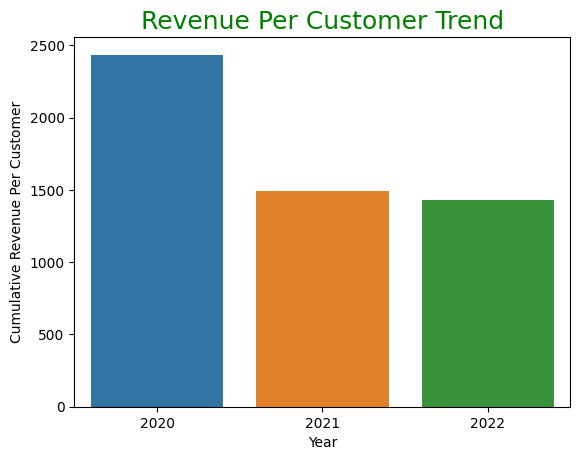

In [105]:
# Plotting Revenue Per Customer Trend (Yearly)
sns.barplot(data=revenue_per_cust,x=revenue_per_cust.index,y='Revenue Per Customer')
plt.title('Revenue Per Customer Trend',fontdict={'size':18,'color':'green'})
plt.xlabel('Year')
plt.ylabel('Cumulative Revenue Per Customer');


In [106]:
aw_combined = aw_sales.merge(aw_customers,on='CustomerKey',how='inner').merge(aw_products,on='ProductKey',how='inner')
aw_combined.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,Region,Country,Continent,...,SKU Type,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,Northwest,United States,North America,...,BK-R50B,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes
1,2020-02-06,2019-10-12,SO45383,332,14734,1,1,Northwest,United States,North America,...,BK-R50B,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes
2,2020-07-27,2020-06-16,SO46896,332,15189,1,1,Northwest,United States,North America,...,BK-R50B,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes
3,2020-08-27,2020-06-21,SO47311,332,15252,1,1,Northwest,United States,North America,...,BK-R50B,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes
4,2020-09-09,2020-05-20,SO47507,332,15311,1,1,Northwest,United States,North America,...,BK-R50B,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes


In [107]:
aw_combined['Revenue'] = aw_combined['ProductPrice'] * aw_combined['OrderQuantity']
aw_combined.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,Region,Country,Continent,...,ProductName,ModelName,ProductDescription,ProductColor,ProductStyle,ProductCost,ProductPrice,SubcategoryName,CategoryName,Revenue
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,Northwest,United States,North America,...,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes,699.1
1,2020-02-06,2019-10-12,SO45383,332,14734,1,1,Northwest,United States,North America,...,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes,699.1
2,2020-07-27,2020-06-16,SO46896,332,15189,1,1,Northwest,United States,North America,...,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes,699.1
3,2020-08-27,2020-06-21,SO47311,332,15252,1,1,Northwest,United States,North America,...,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes,699.1
4,2020-09-09,2020-05-20,SO47507,332,15311,1,1,Northwest,United States,North America,...,"Road-650 Black, 58",Road-650,Value-priced bike with many features of our to...,Black,U,413.15,699.1,Road Bikes,Bikes,699.1


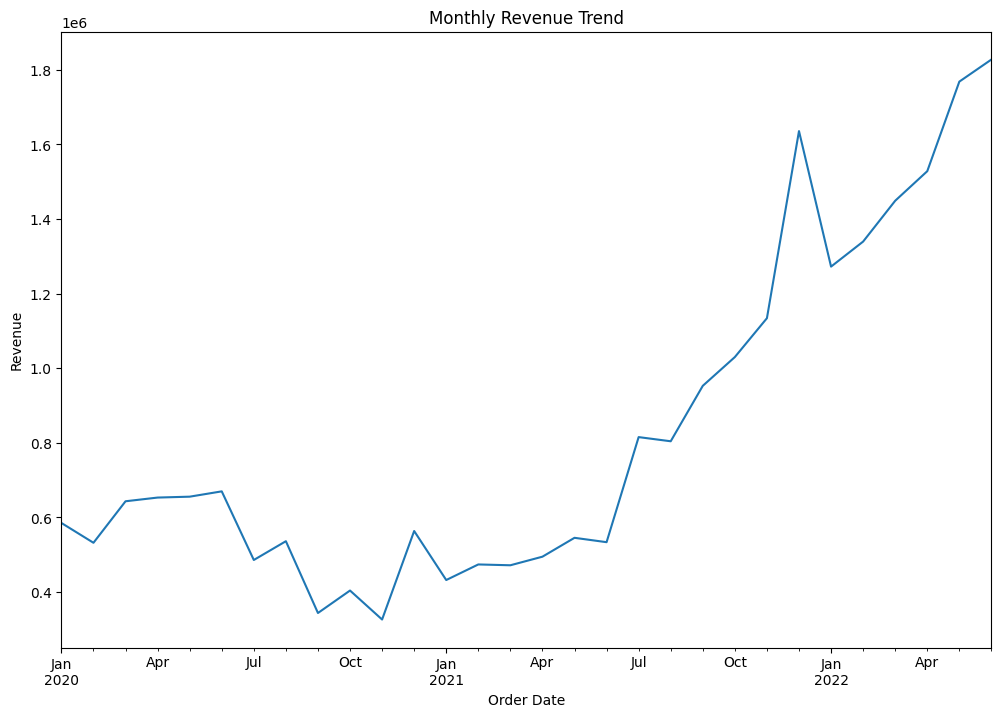

In [108]:
# Plotting Revenue Trend/Monthly Sales Over Time
from matplotlib import dates
plt.figure(figsize=(12,8))
aw_combined.set_index('OrderDate')['Revenue'].resample('M').sum().plot(title='Monthly Revenue Trend',xlabel = 'Order Date',ylabel = 'Revenue');